# Sprint 機械学習 ロジスティック回帰

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# データの読み込み
from sklearn.datasets import load_iris
iris = load_iris()
X = pd.DataFrame(iris.data,columns=iris.feature_names)
y = pd.DataFrame(iris.target,columns=['Species'])
df = pd.concat([X,y],sort=False,axis=1)

# virgicolorとvirginicaを取り出す
df = df[df.Species>=1]
X = df.iloc[:,:4].values
y = df.Species.values

# ０か１のデータにしておく
y = y-1

# trainとtestに分ける
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [2]:
# shapeを確認しておく
print('X_train_std',X_train_std.shape)
print('y_train　　',y_train.shape)
print('X_test_std ',X_test_std.shape)
print('y_test 　　',y_test.shape)

X_train_std (75, 4)
y_train　　 (75,)
X_test_std  (25, 4)
y_test 　　 (25,)


#### 関数が動くか確認するために，仮のデータを作成

In [3]:
# バイアス項の追加
X_1 = np.insert(X_train_std, 0, 1, axis=1)
# シータの初期値
coef = np.random.rand(X_1.shape[1])
# パラメータ
lamda = 0.5
lr = 0.001

# shapeの確認
print('X_1shape:',X_1.shape)
print('coef： 　',coef.shape)

X_1shape: (75, 5)
coef： 　 (5,)


# 【問題1】仮定関数

In [4]:
def sigmoid(X,coef):
    """
    仮定関数．線形回帰の仮定関数をシグモイドにかけている．

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
    データの特徴量
    """
    z = np.dot(X,coef)
    return 1/(1+np.exp(-z))

#### 仮データで値とshapeを確認

In [5]:
hypothesis = sigmoid(X_1,coef)
print('hypothesis_shape：',hypothesis.shape,'\n')
print(hypothesis)

hypothesis_shape： (75,) 

[0.04052918 0.73749668 0.65140053 0.80774825 0.56767324 0.85406556
 0.88524363 0.92803036 0.94642571 0.51922555 0.73655603 0.17542761
 0.16431794 0.4200233  0.93082073 0.65700703 0.65458215 0.15029106
 0.48263623 0.49051936 0.61611991 0.14760577 0.15021875 0.29605497
 0.27364721 0.90764618 0.98759646 0.74483576 0.37527581 0.43429693
 0.95398994 0.4248382  0.71105017 0.33071627 0.91662613 0.01592805
 0.05639718 0.78579073 0.8951071  0.84697974 0.96237473 0.17027537
 0.41888462 0.20562527 0.89766244 0.09243577 0.08549092 0.23135714
 0.80430911 0.9270869  0.19512031 0.70398989 0.9594369  0.93967672
 0.65993172 0.54818498 0.16713843 0.99163327 0.2809434  0.11700698
 0.90266252 0.64435354 0.0639601  0.62991721 0.94410114 0.80682118
 0.6862171  0.27753232 0.52314217 0.14783491 0.49659004 0.99379071
 0.72846586 0.37551871 0.1939855 ]


# 【問題2】最急降下法

In [6]:
def gradient_descent(X,error,lamda,lr,coef):
    """
    最急降下法によるパラメータの更新．

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
    データの特徴量
    error : 次の形のndarray, shape (n_samples,)
    """

    # j = 0（切片）
    j_0 = np.dot(X[:,0].T,error)/len(X)

    #　重み
    step1 = np.dot(X[:,1:].T,error)
    step2 = step1/len(X)
    step3 = step2+(lamda/len(X)*coef[1:])

    # ベクトルを合わせる
    t = np.append(j_0,step3)

    # 学習率をかけて更新
    coef = coef - (lr*t)
    return coef

#### 仮データで確認

In [7]:
# 予測値と実測値の差
error = (sigmoid(X_1,coef))-y_train
print('error_shape',error.shape)

error_shape (75,)


In [8]:
# 10回更新してみる
for i in range(10):
    coef = gradient_descent(X_1,error,lamda,lr,coef)
    print(coef)

[0.38156437 0.49773249 0.70765924 0.46414811 0.59618069]
[0.38151845 0.49773102 0.70755528 0.46427552 0.59631084]
[0.38147252 0.49772954 0.70745131 0.46440292 0.59644099]
[0.3814266  0.49772807 0.70734735 0.46453033 0.59657114]
[0.38138068 0.49772659 0.70724338 0.46465773 0.59670129]
[0.38133476 0.49772512 0.70713942 0.46478513 0.59683144]
[0.38128883 0.49772365 0.70703546 0.46491253 0.59696159]
[0.38124291 0.49772217 0.7069315  0.46503994 0.59709174]
[0.38119699 0.4977207  0.70682754 0.46516734 0.59722188]
[0.38115106 0.49771923 0.70672358 0.46529474 0.59735203]


# 【問題3】推定
### １．predict_proba
predict_probaは仮定関数の返り値で，そのラベルになる確率が戻ってくるため，０～１の連続値になる

In [9]:
def predict_proba(X,coef):
    z = np.dot(X,coef)
    y_proba = 1/(1+np.exp(-z))
    return y_proba

In [10]:
# 仮データで確認
y_proba = predict_proba(X_1,coef)
y_proba

array([0.04037472, 0.73706024, 0.6513756 , 0.80813351, 0.56767885,
       0.854052  , 0.88547779, 0.92817647, 0.94669716, 0.51950081,
       0.73644161, 0.17549147, 0.16434319, 0.42047655, 0.93087341,
       0.65642749, 0.65489806, 0.14997884, 0.48210779, 0.49021552,
       0.61547197, 0.1472024 , 0.14998605, 0.29539191, 0.27325622,
       0.90773893, 0.98761792, 0.74434438, 0.37481946, 0.43388926,
       0.95410048, 0.4242469 , 0.71046315, 0.33027889, 0.91678037,
       0.01589656, 0.05624215, 0.78587373, 0.89529555, 0.84702172,
       0.9624807 , 0.16986578, 0.41903736, 0.20502918, 0.89774998,
       0.09221756, 0.08519188, 0.23089789, 0.8044109 , 0.92713301,
       0.19531139, 0.70374527, 0.95951661, 0.93987667, 0.65983692,
       0.54758165, 0.16705054, 0.99163376, 0.28039203, 0.11681788,
       0.90276136, 0.64491589, 0.06384858, 0.62978333, 0.9441924 ,
       0.80685151, 0.68579309, 0.27698181, 0.52303216, 0.14754884,
       0.49697478, 0.99379774, 0.7289288 , 0.374912  , 0.19365

### ２．predict
上の確率値を，0.5の閾値で１と０に分類した結果が返る．

In [11]:
#0～１の結果
def predict(X,coef):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        z = np.dot(X,coef)
        y_proba = 1/(1+np.exp(-z))
        y_pred = np.where(y_proba < 0.5,0,1)
        
        return y_pred

In [12]:
# 仮データで確認
y_pred = predict(X_1,coef)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0])

# 【問題4】目的関数

In [13]:
def loss(X,y,coef,lamda):
    y_proba = sigmoid(X,coef)
    m = len(X)

    iner_sigma = -y*(np.log(y_proba))-(1-y)*(np.log(1-y_proba))
    sigma = np.sum(iner_sigma)/m
    lamda_add = lamda/(2*m)*np.sum(coef[1:]**2)
    loss = sigma + lamda_add
    return loss

In [14]:
# 仮データで確認
loss(X_1,y_train,coef,lamda)

0.41238127502439814

# 【問題6】学習と推定
### １．スクラッチしたLogisticRegression

In [15]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    lamda : float
        正則化項の定数
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, lamda, bias ,verbose):
        # ハイパーパラメータを属性として記bias録
        self.iter = num_iter
        self.lr = lr
        self.lamda = lamda
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        
        # trainデータ
        #バイアス項を入れる場合はXの０列目に１を挿入する
        if self.bias is False:
            X_new = np.insert(X, 0, 1, axis=1)
        #バイアス項を入れない場合はXの０列目に０を挿入する
        else:
            X_new = np.insert(X, 0, 0, axis=1)

        # シータの初期化
        self.coef_ = np.random.rand(X_new.shape[1])
        
        # num_iterの数だけ以下を更新
        for i in range(self.iter):
            # 仮定関数
            hypothesis = self._sigmoid(X_new,self.coef_)
            
            # 予測と実測値との誤差
            error = hypothesis - y
            
            # 最急降下法
            self.coef_ = self._gradient_descent(X_new,error,self.coef_)
            
            # lossを記録
            self.loss[i] = self._entropy(X_new,y,self.coef_)
        
            # 学習過程の出力
            if self.verbose is True:
                map_result = map(str, self.loss)
                result = ',\n'.join(map_result)                
                print('Train Data Loss 学習{0}回目: \n{1}'.format(i,result))
            else:
                pass
        
        
        
        # 検証用データがある場合
        if X_val is not None:
            #バイアス項を入れる場合はXの０列目に１を挿入する
            if self.bias is False:
                X_val_new = np.insert(X_val, 0, 1, axis=1)
            #バイアス項を入れない場合、0を挿入する
            else:
                X_val_new = np.insert(X_val, 0, 0, axis=1)

            # シータの初期化
            self.coef_val_ = np.random.rand(X_val_new.shape[1])


            # num_iterの数だけ更新
            for i in range(self.iter):
                # 仮定関数
                hypothesis_val = self._sigmoid(X_val_new,self.coef_val_)

                # 予測と実測値の誤差
                error_val = hypothesis_val - y_val

                # 最急降下法
                self.coef_val_ = self._gradient_descent(X_val_new, error_val,self.coef_val_)

                # lossを記録
                self.val_loss[i] = self._entropy(X_val_new,y_val,self.coef_val_)
                
                # 学習過程の出力
                if self.verbose is True:
                    map_result_val = map(str, self.val_loss)
                    result_val = ',\n'.join(map_result_val)                
                    print('\nTest Data Loss 学習{0}回目: \n{1}'.format(i,result_val))
                else:
                    pass


    def _sigmoid(self,X,coef):
        """
        　仮定関数．線形回帰の仮定関数をシグモイドにかけている．
        
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            データの特徴量
        """
        z = np.dot(X,coef)
        return 1/(1+np.exp(-z))   

        
            
    def _gradient_descent(self,X,error,coef):
        """
          最急降下法によるパラメータの更新．
        
        Parameters
        ----------
        X : 　　次の形のndarray, shape (n_samples, n_features)
           　　 データの特徴量
        error : 次の形のndarray, shape (n_samples,)
        """
        
        # j = 0（切片）
        j_0 = np.dot(X[:,0].T,error)/len(X)
       
        # 重み
        step1 = np.dot(X[:,1:].T,error)
        step2 = step1/len(X)
        step3 = step2 + ((self.lamda/len(X))*coef[1:])
        
        # ベクトルを合わせる
        t = np.append(j_0,step3)

        # 学習率をかけて更新
        coef = coef - (self.lr*t)
        
        return coef
        
    
    def _entropy(self,X,y,coef):
        """
          損失関数の計算．
        
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            データの正解値
        
        error : 次の形のndarray, shape (n_samples,)
        """
        y_proba = self._sigmoid(X,coef)
        m = len(X)
        iner_sigma = -y*(np.log(y_proba))-(1-y)*(np.log(1-y_proba))
        sigma = np.sum(iner_sigma)/m
        lamda_add = self.lamda/(2*m)*np.sum(coef[1:]**2)
        loss = sigma + lamda_add
        return loss

     # ０か１の結果       
    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """

        #バイアス項を入れる場合はXの０列目に１を挿入する
        if self.bias is False:
            X_add = np.insert(X, 0, 1, axis=1)
        #バイアス項を入れない場合、0を挿入する
        else:
            X_add = np.insert(X, 0, 0, axis=1)
        
        z = np.dot(X_add,self.coef_)
        y_proba = 1/(1+np.exp(-z))
        # y_prpbaが0.5未満なら０，以上なら１
        y_pred = np.where(y_proba < 0.5,0,1)
        return y_pred

    # ０～１の確率
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """

        #バイアス項を入れる場合はXの０列目に１を挿入する
        if self.bias is False:
            X_add = np.insert(X, 0, 1, axis=1)
        #バイアス項を入れない場合、0を挿入する
        else:
            X_add = np.insert(X, 0, 0, axis=1)
        
        z = np.dot(X_add,self.coef_)
        y_proba = 1/(1+np.exp(-z))
        
        return y_proba

### 学習と推定

In [38]:
slr = ScratchLogisticRegression(num_iter=5000, lr=0.01, lamda=0.5,bias=False ,verbose=False)
slr.fit(X_train_std,y_train,X_test_std,y_test)

In [39]:
y_pred = slr.predict(X_test_std)
y_proba = slr.predict_proba(X_test_std)
print('y_pred:\n',y_pred,'\n')
print('y_proba:\n',y_proba,'\n')

# Accuracy，Precision，Recall
print(classification_report(y_test,y_pred))

y_pred:
 [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0] 

y_proba:
 [0.19803322 0.99225477 0.2258485  0.99872515 0.9600262  0.99578431
 0.145565   0.77146694 0.99436247 0.97863108 0.94742413 0.92176504
 0.98919753 0.16154071 0.00175325 0.01006538 0.53466021 0.03175422
 0.71746103 0.0690067  0.00205624 0.97579574 0.05584398 0.90382252
 0.01545455] 

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.86      1.00      0.92        12

   micro avg       0.92      0.92      0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25



In [40]:
print('切片：',slr.coef_[0])
print('重み：',slr.coef_[1:])

切片： 0.2622906509375027
重み： [-0.22809826 -0.67086577  2.43699459  2.06518508]


## ２．scikit-learnのLogisticRegression

In [41]:
from sklearn.linear_model import LogisticRegression
# 初期化，学習，推定
model = LogisticRegression()
model.fit(X_train_std,y_train)
y_pred_sk = model.predict(X_test_std)
y_proba_sk = model.predict_proba(X_test_std)
print('y_pred:\n',y_pred_sk,'\n')
print('y_proba:\n',y_proba_sk,'\n')

# Accuracy，Precision，Recall
print(classification_report(y_test,y_pred_sk))

y_pred:
 [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0] 

y_proba:
 [[0.80361766 0.19638234]
 [0.01002104 0.98997896]
 [0.78063258 0.21936742]
 [0.00210047 0.99789953]
 [0.05475811 0.94524189]
 [0.00586772 0.99413228]
 [0.84662253 0.15337747]
 [0.23908503 0.76091497]
 [0.00762694 0.99237306]
 [0.02493299 0.97506701]
 [0.06549189 0.93450811]
 [0.08695882 0.91304118]
 [0.01383852 0.98616148]
 [0.83634644 0.16365356]
 [0.99742792 0.00257208]
 [0.98707756 0.01292244]
 [0.47656592 0.52343408]
 [0.96426509 0.03573491]
 [0.30299805 0.69700195]
 [0.92794091 0.07205909]
 [0.99698723 0.00301277]
 [0.03006349 0.96993651]
 [0.93323831 0.06676169]
 [0.10235031 0.89764969]
 [0.98202608 0.01797392]] 

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.86      1.00      0.92        12

   micro avg       0.92      0.92      0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93    

C:\Users\miyas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# 【問題7】学習曲線のプロット

<function matplotlib.pyplot.show(*args, **kw)>

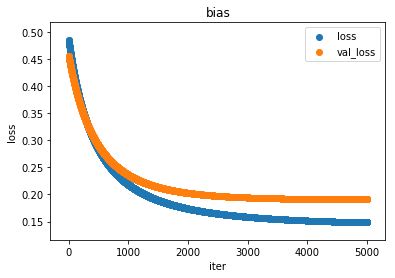

In [42]:
plt.scatter(np.array(range(slr.iter)), slr.loss, label="loss")
plt.scatter(np.array(range(slr.iter)), slr.val_loss, label="val_loss")

plt.title("bias")
plt.xlabel("iter")
plt.ylabel("loss")
plt.legend()

plt.show

# 【問題8】決定領域の可視化
今回はsepal lengthとpetal lengthで可視化

In [43]:
# データの準備
# versicolorとvirginicaのみを抜き出す
iris_versicolor1 = df[df.Species==1]
iris_virginica2 = df[df.Species==2]

# sepal lengthとpetal lengthのみ抜き出す
X_train_plot= X_train[:,[0,2]]
X_test_plot = X_test[:,[0,2]]

In [44]:
# ↑のデータで学習
slr_p = ScratchLogisticRegression(num_iter=3000, lr=0.01, lamda=1,bias=False ,verbose=False)
slr_p.fit(X_train_plot,y_train)

In [45]:
# 回帰直線の式
xrange = np.arange(4,9,0.1)
by = -(slr_p.coef_[0]+slr_p.coef_[1]*xrange)/slr_p.coef_[2]

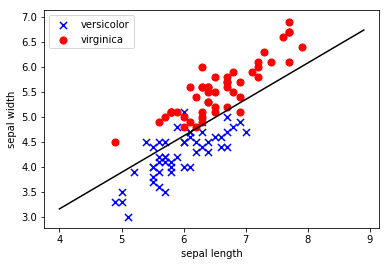

In [46]:
# versicolor
plt.scatter(iris_versicolor1['sepal length (cm)'],iris_versicolor1['petal length (cm)'],marker='x',c='b',s=50,label='versicolor')
# virginica
plt.scatter(iris_virginica2['sepal length (cm)'],iris_virginica2['petal length (cm)'],marker='o',c='r',s=50,label='virginica')
# 決定境界
plt.plot(xrange,by,c='k')

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()